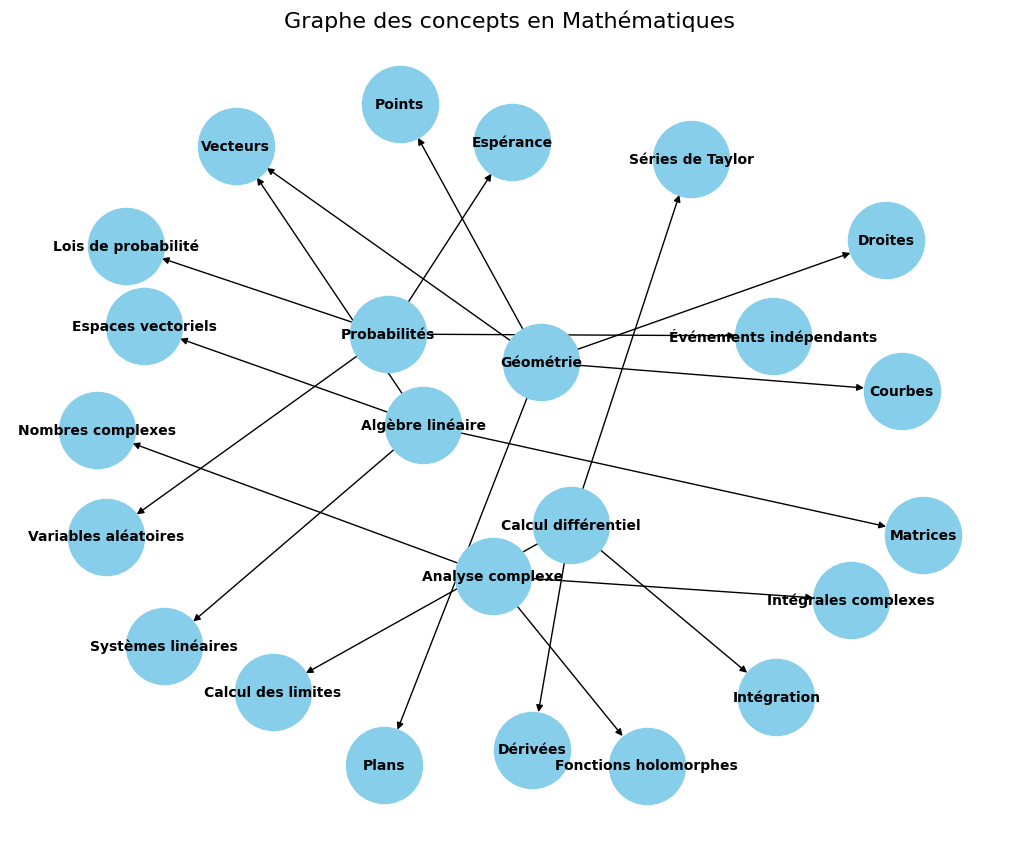

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe vide
G = nx.DiGraph()

# Concepts principaux (par exemple, des chapitres de mathématiques)
concepts_principaux = [
    "Algèbre linéaire",
    "Calcul différentiel",
    "Analyse complexe",
    "Géométrie",
    "Probabilités"
]

# Sous-concepts pour chaque concept principal
sous_concepts = {
    "Algèbre linéaire": [
        "Vecteurs", "Matrices", "Systèmes linéaires", "Espaces vectoriels"
    ],
    "Calcul différentiel": [
        "Dérivées", "Intégration", "Calcul des limites", "Séries de Taylor"
    ],
    "Analyse complexe": [
        "Nombres complexes", "Fonctions holomorphes", "Intégrales complexes"
    ],
    "Géométrie": [
        "Points", "Vecteurs", "Droites", "Plans", "Courbes"
    ],
    "Probabilités": [
        "Variables aléatoires", "Lois de probabilité", "Espérance", "Événements indépendants"
    ]
}

# Ajouter les concepts principaux dans le graphe
for concept in concepts_principaux:
    G.add_node(concept)

# Ajouter les sous-concepts et les relier aux concepts principaux
for concept, sous_concept_list in sous_concepts.items():
    for sous_concept in sous_concept_list:
        G.add_node(sous_concept)
        G.add_edge(concept, sous_concept)  # Relier le concept principal au sous-concept

# Affichage du graphe
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Pour une disposition claire des nœuds
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Graphe des concepts en Mathématiques", fontsize=16)
plt.show()
